c:\Users\faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\faiza\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


R2 Score (Disputes): 0.9999681137492475
R2 Score (Avg_Rating): 0.9999767689501172
Accuracy (Is_Fraud): 0.9881070366699702


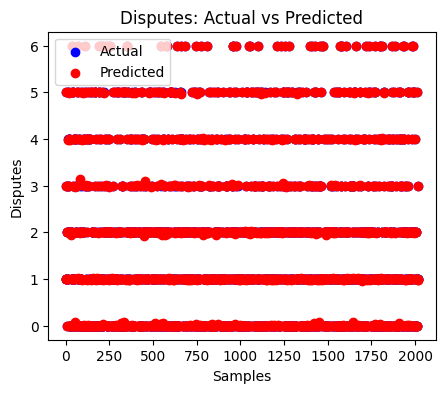

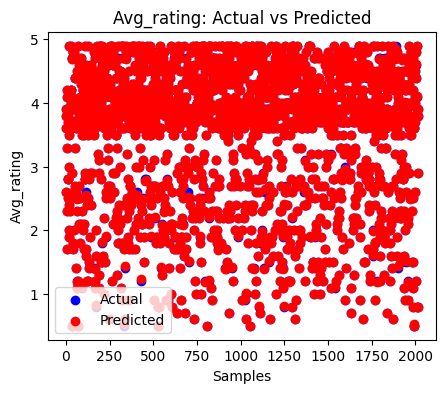

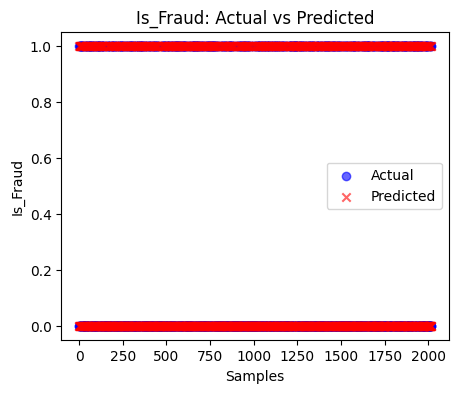

In [14]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from category_encoders import TargetEncoder
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from scipy.sparse import hstack,csr_matrix
from sklearn.ensemble import BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import accuracy_score,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Fraud 6.csv") 

y1 = df["Disputes"]
y2 = df["Avg_Rating"]
y3 = df["Is_Fraud"] 

encoder1 = TargetEncoder()
X1 = encoder1.fit_transform(df[["Name"]],y1)
X1 = csr_matrix(X1)

encoder2 = OneHotEncoder()
X2 = encoder2.fit_transform(df[["Account_Type"]])


encoder3 = MinMaxScaler()
X3 = encoder3.fit_transform(df[["Account_Age_Days"]])
X3 = csr_matrix(X3)

encoder4 = MinMaxScaler()
X4 = encoder4.fit_transform(df[["Completed_Projects / Posted_Jobs"]])
X4 = csr_matrix(X4)

X = hstack([X1,X2,X3,X4])



X_train,X_test,y1_train,y1_test,y2_train,y2_test,y3_train,y3_test = train_test_split(X,y1,y2,y3,test_size=0.2,random_state=42)


model1 = RandomForestRegressor()
model1.fit(X_train,y1_train)

y1_pred = model1.predict(X_test)

model2 = RandomForestRegressor()
model2.fit(X_train,y2_train)

y2_pred = model2.predict(X_test)

model3 = RandomForestClassifier()
model3.fit(X_train,y3_train)

y3_pred = model3.predict(X_test)

new_data1 = pd.DataFrame({"Name":["Olivia"]})
new_data2 = [["Client"]]
new_data3 = [[120]]
new_data4 = [[9]]

r1 = encoder1.transform(new_data1)
r1 = csr_matrix(r1)

r2 = encoder2.transform(new_data2)


r3 = encoder3.transform(new_data3)
r3 = csr_matrix(r3)

r4 = encoder4.transform(new_data4)
r4 = csr_matrix(r4)

inp = hstack([r1,r2,r3,r4])


result1 = model1.predict(inp)
result2 = model2.predict(inp)
result3 = model3.predict(inp)

data = pd.DataFrame({
    "Disputes":result1,
    "Avg_Rating":result2,
    "Is_Fraud":result3,

})


print("R2 Score (Disputes):", r2_score(y1_test, y1_pred))
print("R2 Score (Avg_Rating):", r2_score(y2_test, y2_pred))
print("Accuracy (Is_Fraud):", accuracy_score(y3_test, y3_pred))


data                 


plt.figure(figsize=(5,4))
plt.scatter(range(len(y1_test)), y1_test, color='blue', label='Actual')
plt.scatter(range(len(y1_test)), y1_pred, color='red', label='Predicted')
plt.xlabel("Samples")
plt.ylabel("Disputes")
plt.title("Disputes: Actual vs Predicted")
plt.legend()
plt.show()


plt.figure(figsize=(5,4))
plt.scatter(range(len(y2_test)), y2_test, color='blue', label='Actual')
plt.scatter(range(len(y2_test)), y2_pred, color='red', label='Predicted')
plt.xlabel("Samples")
plt.ylabel("Avg_rating")
plt.title("Avg_rating: Actual vs Predicted")
plt.legend()
plt.show()


plt.figure(figsize=(5,4))
plt.scatter(range(len(y3_test)), y3_test, color='blue', label='Actual', marker='o', alpha=0.6)
plt.scatter(range(len(y3_test)), y3_pred, color='red', label='Predicted', marker='x', alpha=0.6)
plt.xlabel("Samples")
plt.ylabel("Is_Fraud")
plt.title("Is_Fraud: Actual vs Predicted")
plt.legend()
plt.show()

In [15]:
import joblib

joblib.dump(encoder1,"encoder1.pkl")
joblib.dump(encoder2,"encoder2.pkl")
joblib.dump(encoder3,"encoder3.pkl")
joblib.dump(encoder4,"encoder4.pkl")

model1 = joblib.dump(model1,"model1.pkl")
model2 = joblib.dump(model2,"model2.pkl")
model3 = joblib.dump(model3,"model3.pkl")
